# Figures

Prepared for "Restaurants and Covid 19" presentation for the UW Now series on March 2, 2021. 

Kim J. Ruhl 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader as pdr

### Employment and Sales

The data are from BLS and accessed through FRED. 

In [3]:
bls = pdr.get_data_fred(['CES7072200001', 'USPRIV', 'RSFSDP', 'RSGCS', 'WINA'])
bls.columns = ['emp_70722', 'emp_all', 'sales_70722', 'sales_grocery', 'emp_all_wi']



It will be easier to compare the variables in year-on-year growth rates.

In [4]:
bls_yy = bls.pct_change(12)*100

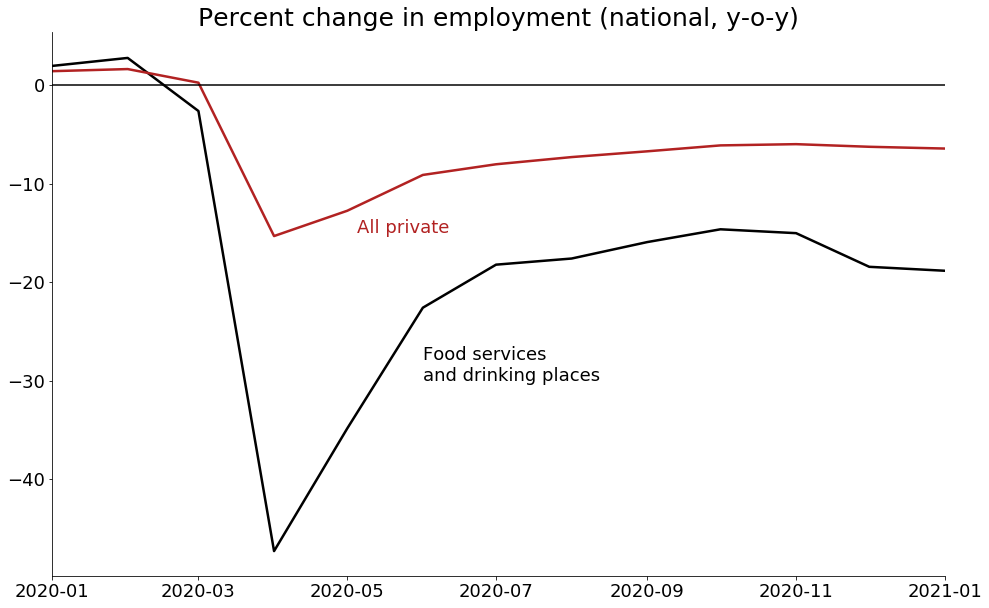

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(bls_yy.index, bls_yy['emp_70722'], color='black', lw=2.5)
ax.plot(bls_yy.index, bls_yy['emp_all'], color='firebrick',lw=2.5)
ax.axhline(0, color='black')
ax.tick_params(axis='both', labelsize=18 )
ax.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))


ax.text(dt.datetime(2020,5,5), -15, 'All private', fontsize=18, color='firebrick')
ax.text(dt.datetime(2020,6,1), -30, 'Food services \nand drinking places', fontsize=18)

ax.set_title('Percent change in employment (national, y-o-y)', fontsize=25)

sns.despine()

plt.savefig('nat_emp.svg', bbox_inches='tight')

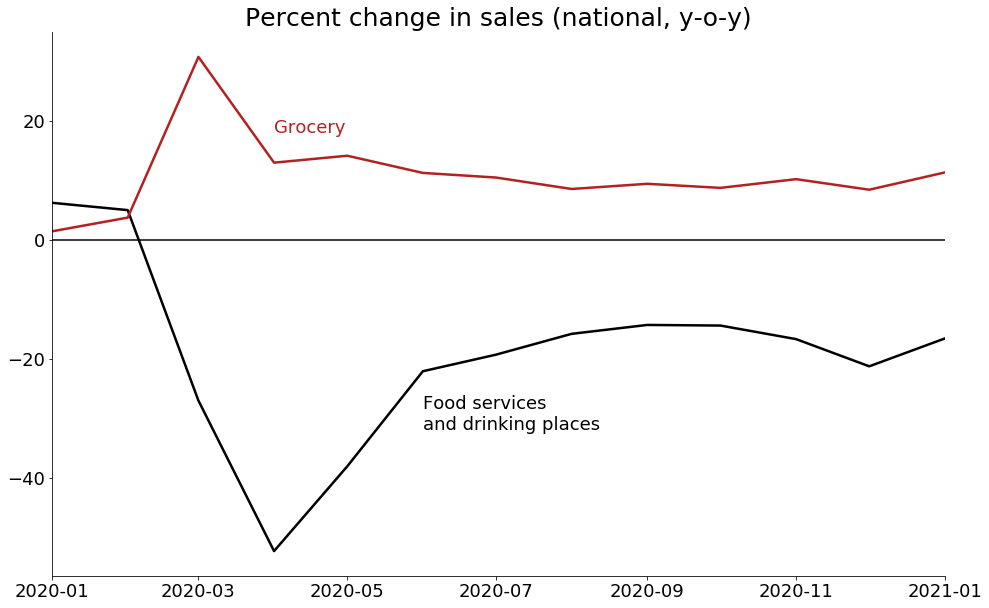

In [6]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(bls_yy.index, bls_yy['sales_70722'], color='black', lw=2.5)
ax.plot(bls_yy.index, bls_yy['sales_grocery'], color='firebrick',lw=2.5)
ax.axhline(0, color='black')
ax.tick_params(axis='both', labelsize=18 )
ax.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))


ax.text(dt.datetime(2020,4,1), 18, 'Grocery', fontsize=18, color='firebrick')
ax.text(dt.datetime(2020,6,1), -32, 'Food services \nand drinking places', fontsize=18)

ax.set_title('Percent change in sales (national, y-o-y)', fontsize=25)

sns.despine()
plt.savefig('nat_sales.svg', bbox_inches='tight')

### Business formation
The data on business formation are from the BLS. Accessed from: [https://www.bls.gov/bdm/](https://www.bls.gov/bdm/)

Industry 72 is "accommodation and food services" and 00 is "all private."

In [9]:
biz = pd.read_excel('biz_form.xlsx', parse_dates=['date'])
biz.set_index('date', inplace=True)
biz_yy = biz.pct_change(12)*100
biz_yy.head(2)

,app_72_nat,app_00_nat
date,,
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN


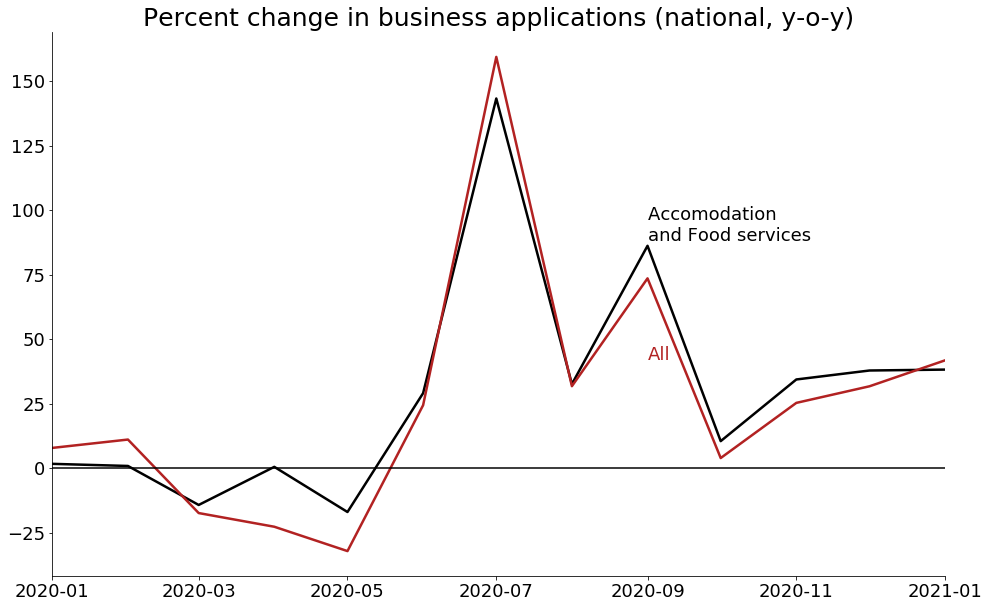

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(biz_yy.index, biz_yy['app_00_nat'], color='black', lw=2.5)
ax.plot(biz_yy.index, biz_yy['app_72_nat'], color='firebrick',lw=2.5)
ax.axhline(0, color='black')
ax.tick_params(axis='both', labelsize=18 )
ax.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))


ax.text(dt.datetime(2020,9,1), 42, 'All', fontsize=18, color='firebrick')
ax.text(dt.datetime(2020,9,1), 88, 'Accomodation \nand Food services', fontsize=18)

ax.set_title('Percent change in business applications (national, y-o-y)', fontsize=25)

sns.despine()
plt.savefig('nat_apps.svg', bbox_inches='tight')

### The JOLTs Data

In [ ]:
jolts = pdr.get_data_fred(['JTS7200JOR', 'JTS7200HIR', 'JTU7200LDR', 'JTS7200QUR', 'JTS7200TSR', 'JTSHIR', 'JTSTSR'])
jolts.columns = ['opens', 'hires', 'layoffs', 'quits', 'sep', 'hires_all', 'sep_all']

In [88]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates

years_fmt = mdates.DateFormatter('%Y-%m')

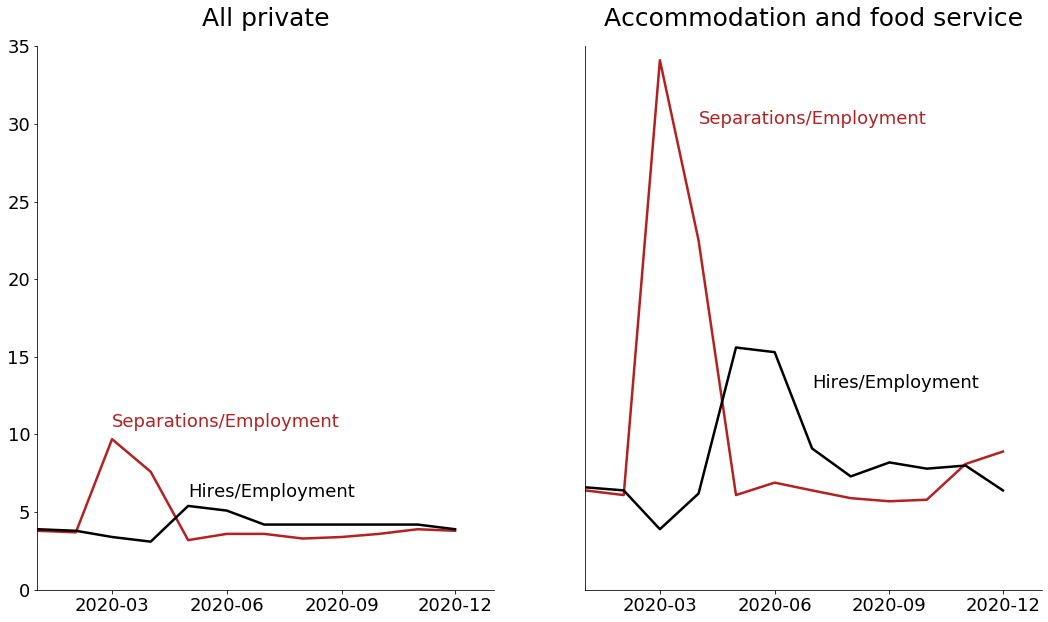

In [99]:
fig, ax = plt.subplots(1,2, figsize=(18,10))

ax[0].plot(jolts.index, jolts['sep_all'], color='firebrick', lw=2.5)
ax[0].plot(jolts.index, jolts['hires_all'], color='black', lw=2.5)

ax[1].plot(jolts.index, jolts['sep'], color='firebrick', lw=2.5)
ax[1].plot(jolts.index, jolts['hires'], color='black', lw=2.5)

ax[0].set_title('All private', fontsize=25, pad=20)
ax[1].set_title('Accommodation and food service', fontsize=25, pad=20)

for a in ax:
    a.set_xlim(dt.datetime(2020,1,1), dt.datetime(2021,1,1))
    a.set_ylim(0,35)
    sns.despine(ax=a)
    a.tick_params(axis='both', labelsize=18 )
    a.xaxis.set_major_formatter(years_fmt)
    a.set_xticks([dt.datetime(2020,3,1), dt.datetime(2020,6,1), dt.datetime(2020,9,1), dt.datetime(2020,12,1)])
    
ax[1].tick_params(axis='y', left=False, labelleft=False)
ax[0].text(dt.datetime(2020,3,1), 10.5, 'Separations/Employment', fontsize=18, color='firebrick')
ax[0].text(dt.datetime(2020,5,1), 6, 'Hires/Employment', fontsize=18, color='black')
ax[1].text(dt.datetime(2020,4,1), 30, 'Separations/Employment', fontsize=18, color='firebrick')
ax[1].text(dt.datetime(2020,7,1), 13, 'Hires/Employment', fontsize=18, color='black')

plt.savefig('jolts_compare.svg', bbox_inches='tight')
plt.show()